In [1]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [3]:
files = pipeline.readfiles("../demyelination/data/destexhe/activity/");
df = pipeline.preparedf(files, (3000, 5000));

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** mnist.loader ** package is not installed. To have functions using mnist.loader please install the package.
** tables ** package is not installed. To have functions using tables please install the package.


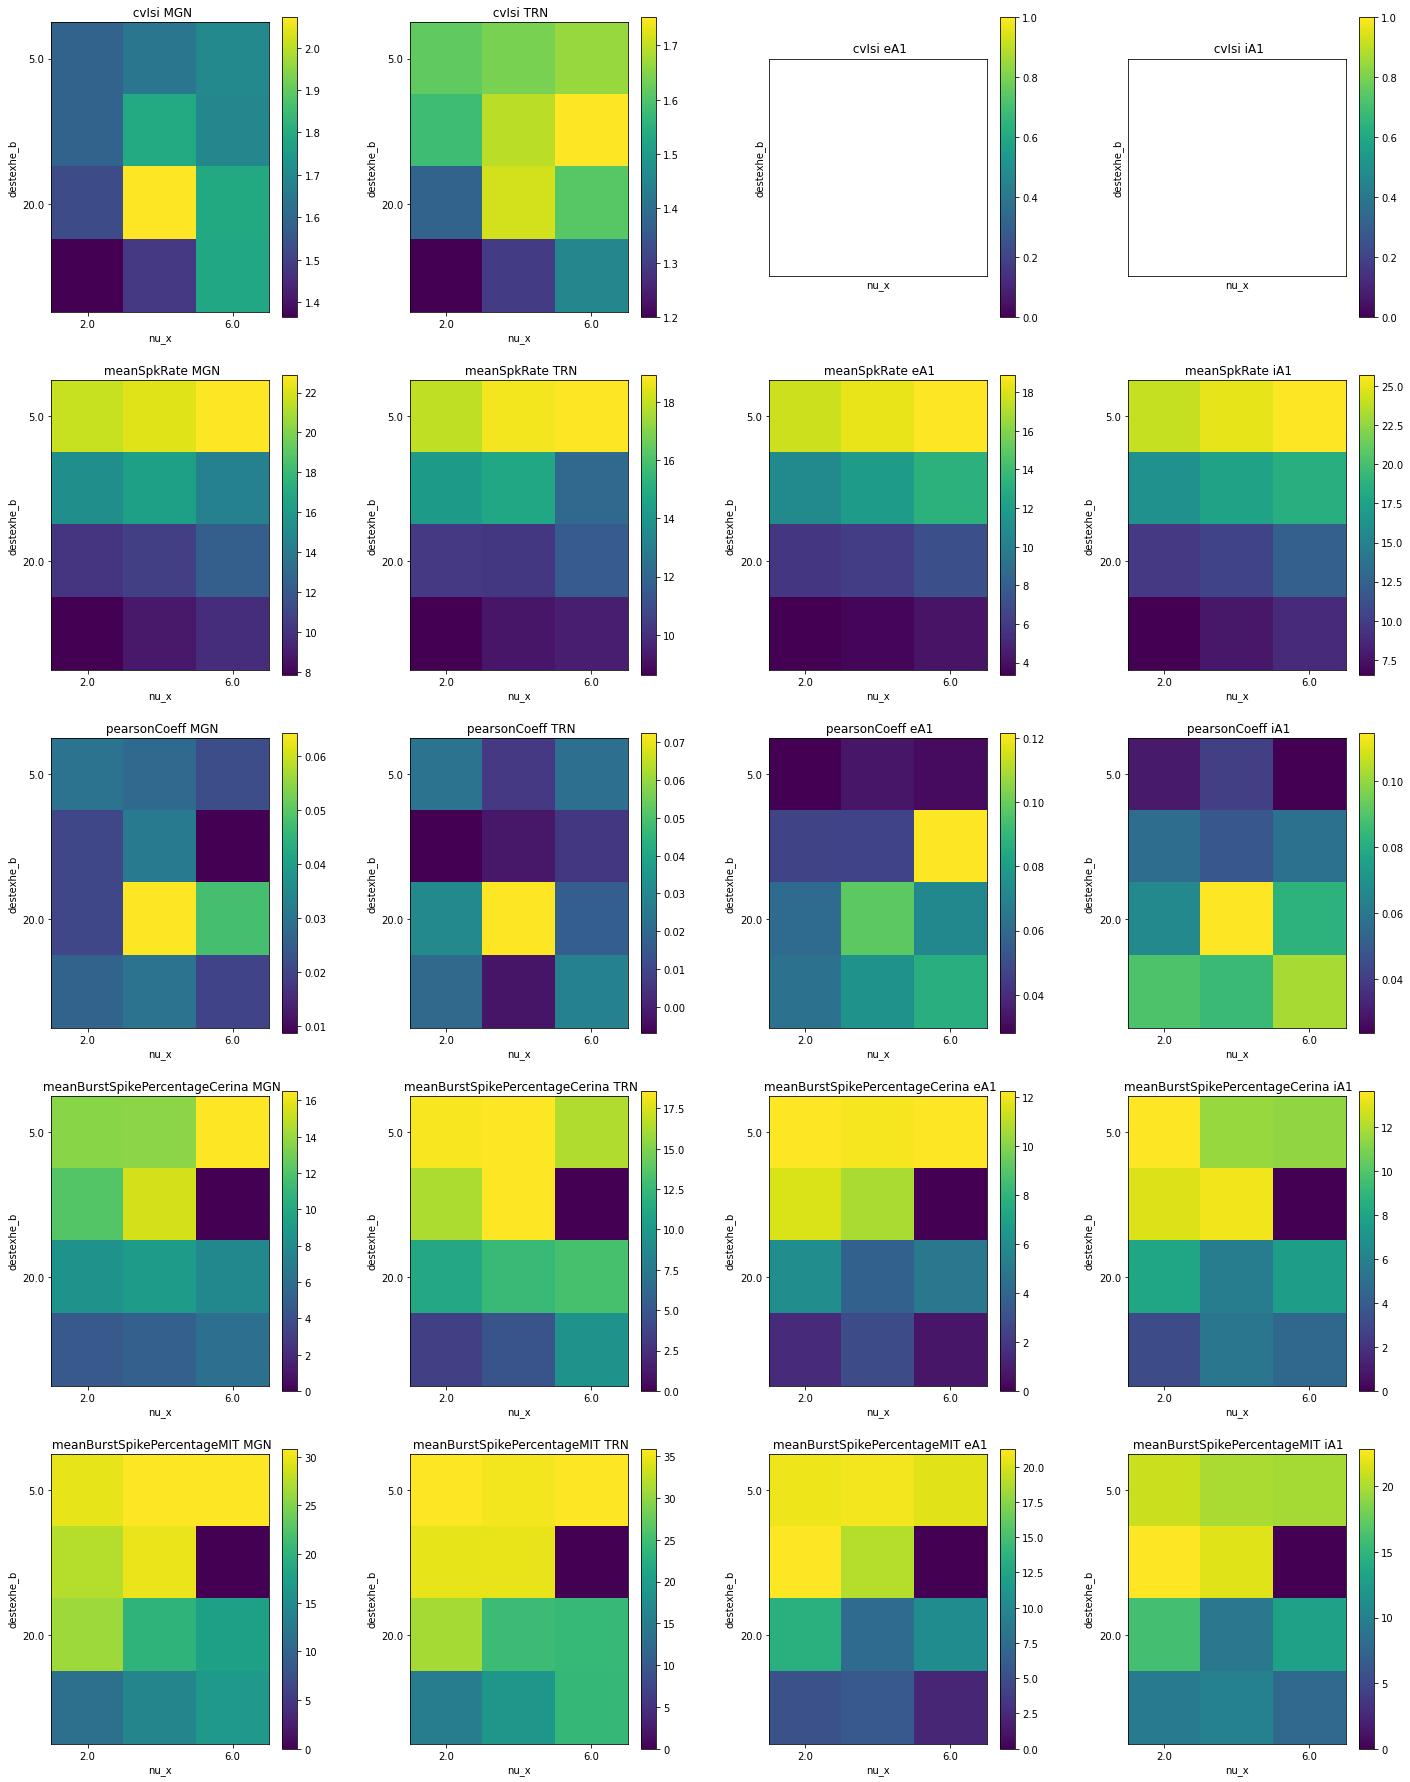

In [17]:
fig, ax = plt.subplots(nrows=5, ncols=4)

fig.set_size_inches(20, 25)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "destexhe_b"
vartwo = "nu_x"
parts = ["MGN", "TRN", "eA1", "iA1"]

# dfFilter = df[varone] > 11
dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeff", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe2009-scan-b-nux.pdf")

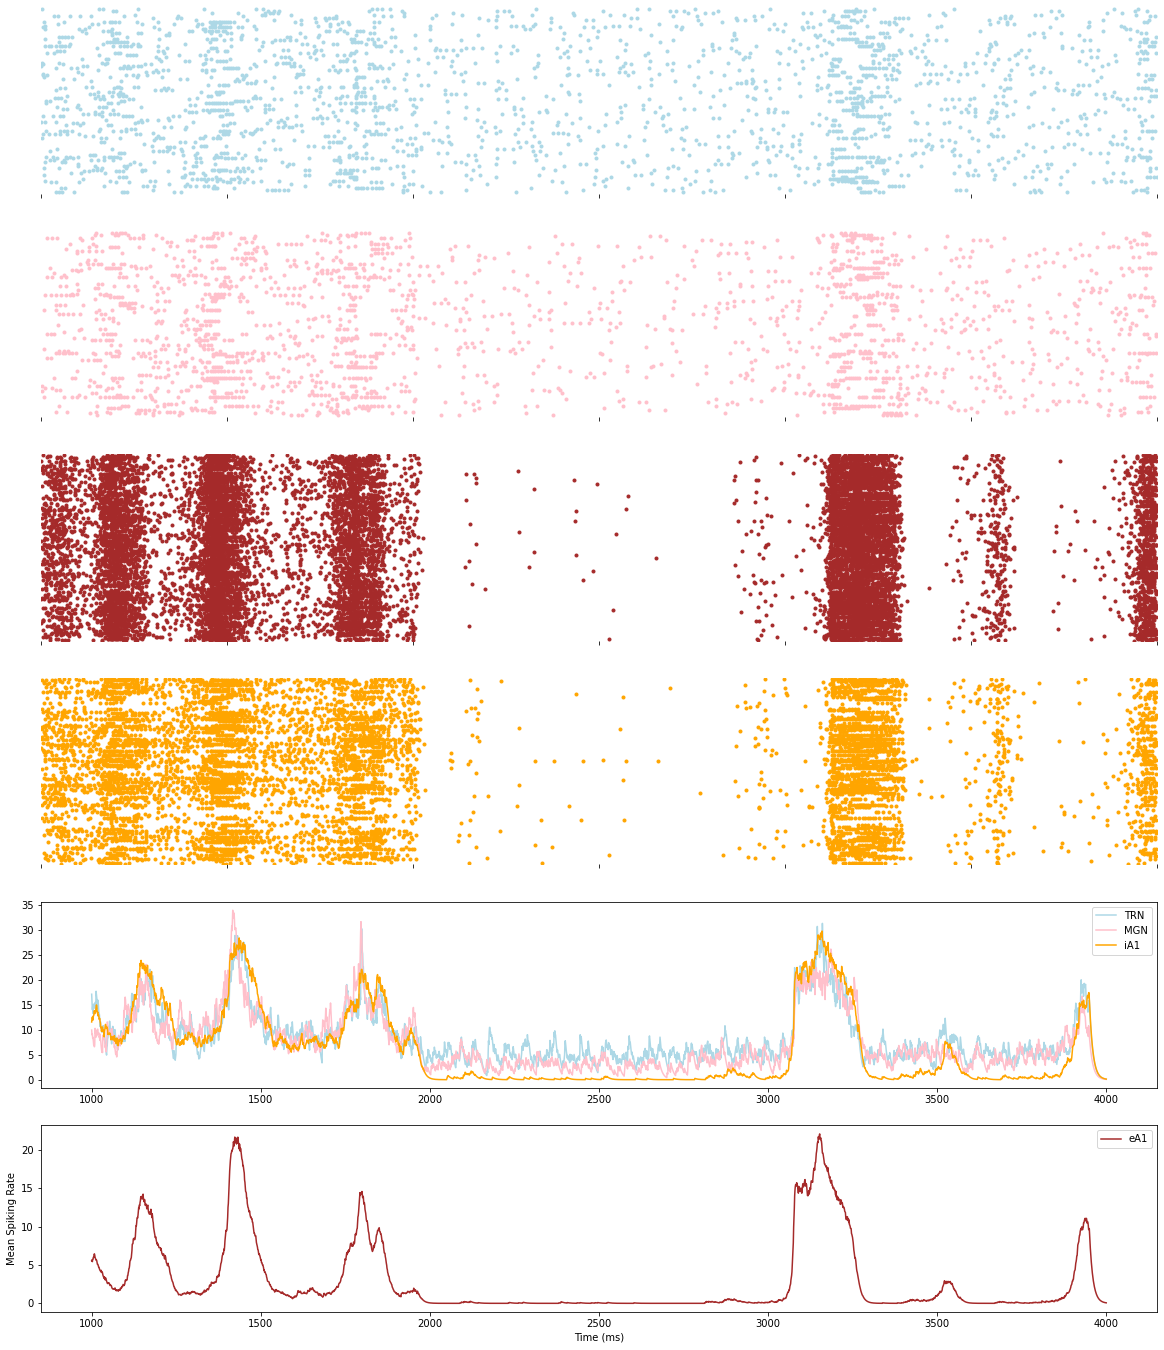

In [16]:
pth = "../demyelination/data/destexhe/activity/"
f = ['spk_destexhe_b=40.0_nu_x=2_T=1']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1000
tstop = 4000
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = pipeline.smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='MGN', c='pink')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='eA1', c='brown')

x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

# print("MEAN SPIKING RATE: ", p.spikeobj['MGN'].time_slice(300, 500).mean_rate(), \
#       p.spikeobj['MGN'].time_slice(500, 600).mean_rate(),\
#       p.spikeobj['MGN'].time_slice(1000, 2000).mean_rate())
# print("MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(300, 500).mean_rate(), \
#       p.spikeobj['eA1'].time_slice(500, 600).mean_rate(),\
#       p.spikeobj['eA1'].time_slice(1000, 2000).mean_rate())
# print("PEARSON COEFF: ", p.spikeobj['eA1'].time_slice(300, 500).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
#       p.spikeobj['eA1'].time_slice(500, 600).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
#       p.spikeobj['eA1'].time_slice(1000, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])
# print("PEARSON COEFF: ", p.spikeobj['MGN'].time_slice(300, 500).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
#       p.spikeobj['MGN'].time_slice(500, 600).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
#       p.spikeobj['MGN'].time_slice(1000, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])
# print("CV_ISI: ", p.spikeobj['MGN'].time_slice(2000, 3000).cv_isi().mean(), p.spikeobj['TRN'].time_slice(2000, 3000).cv_isi().mean())
# print("PEARSON COEFF: ", p.metrics['pearsoncoeff']['MGN'], p.metrics['pearsoncoeff']['TRN'])
#np.mean(p.spikeobj['MGN'].averaged_instantaneous_rate(resolution=1., kernel=kernel, norm=1000))

# plt.title("Stimulation of the MGN at 4.67Hz with a weight of 15 from 500ms to 600ms. \
# Mean Firing Rate of eA1 Before Stim: 8.5Hz, During: 19.3Hz, After: 8.1Hz\
# Pearson Pairwise Coeff of eA1 Before Stim: 0.02, During: 0.02, After: 0.0007")

plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe2009-b=40-nux=2.pdf")